<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 8 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

Please add your name and date

Name: Md Ershadul Haque

Department: Mechanical, Aerospace, and Biomedical Engineering

Date: 11/08/2024

In this homework, we will explore the use of ChatGPT as a code assistant to help understand and operationalize neural networks. As we discussed during the class, ChatGPT does an excellent work with simple code development - as long as the tasks are well formulated and we can check the code and results.

# Fashion MNIST classifier

Example prompt: "Write a Python code importing fashion MNIST data set and visualizing 10 random images along with the labels"

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


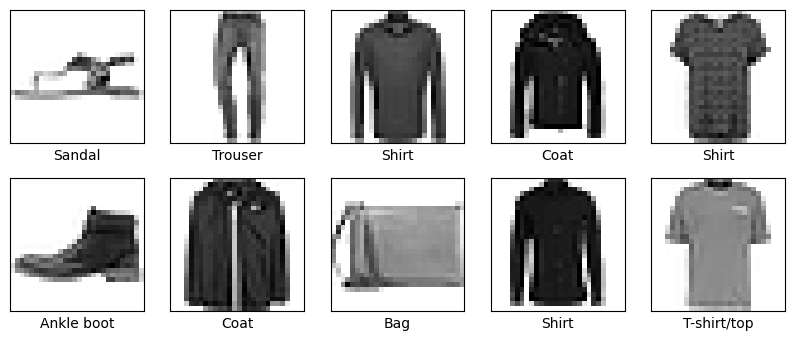

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set the figure size
plt.figure(figsize=(10, 4))

# Select 10 random indices
random_indices = np.random.choice(len(train_images), 10)

# Plot images and labels
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[idx]])

plt.show()

1. Ask ChatGPT to write a DCNN classifier for Fashion-MNIST data. Specify that the network should use the dropout layers and normalization layers. Code should save the trained network weights, and also save history (loss and accuracy).

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6639 - loss: 0.9963 - val_accuracy: 0.8302 - val_loss: 0.4530
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8205 - loss: 0.5000 - val_accuracy: 0.8511 - val_loss: 0.4012
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8470 - loss: 0.4304 - val_accuracy: 0.8692 - val_loss: 0.3572
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8547 - loss: 0.4006 - val_accuracy: 0.8609 - val_loss: 0.3710
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8670 - loss: 0.3734 - val_accuracy: 0.8818 - val_loss: 0.3169
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8686 - loss: 0.3667 - val_accuracy: 0.8806 - val_loss: 0.3215
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8736 - loss: 0.3488 - val_accuracy: 0.8819 - val_loss: 0.3130
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8789 - loss: 0.3361

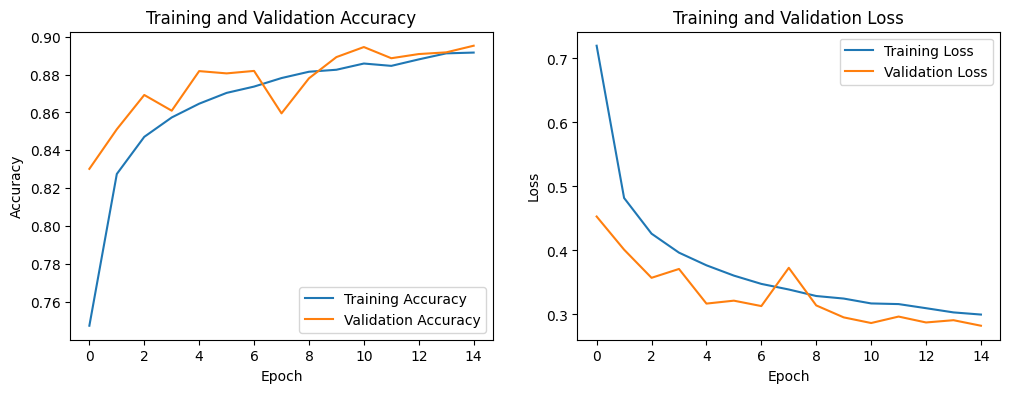

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add a channel dimension for the convolutional layers
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

# Save the model weights
model.save_weights('fashion_mnist_dcnn_weights.weights.h5')

# Alternatively, save the full model (architecture + weights)
model.save('fashion_mnist_dcnn_model.h5')

# Save the training history
with open('fashion_mnist_dcnn_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

2. Plot the evolution of the loss and accuracy for trianing and test data

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6542 - loss: 1.0272 - val_accuracy: 0.7957 - val_loss: 0.5152
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8223 - loss: 0.5021 - val_accuracy: 0.8497 - val_loss: 0.4039
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8398 - loss: 0.4430 - val_accuracy: 0.8543 - val_loss: 0.3796
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8519 - loss: 0.4150 - val_accuracy: 0.8593 - val_loss: 0.3813
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8582 - loss: 0.3903 - val_accuracy: 0.8712 - val_loss: 0.3411
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8675 - loss: 0.3641 - val_accuracy: 0.8806 - val_loss: 0.3248
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8728 - loss: 0.3545 - val_accuracy: 0.8728 - val_loss: 0.3466
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8738 - loss: 0.35

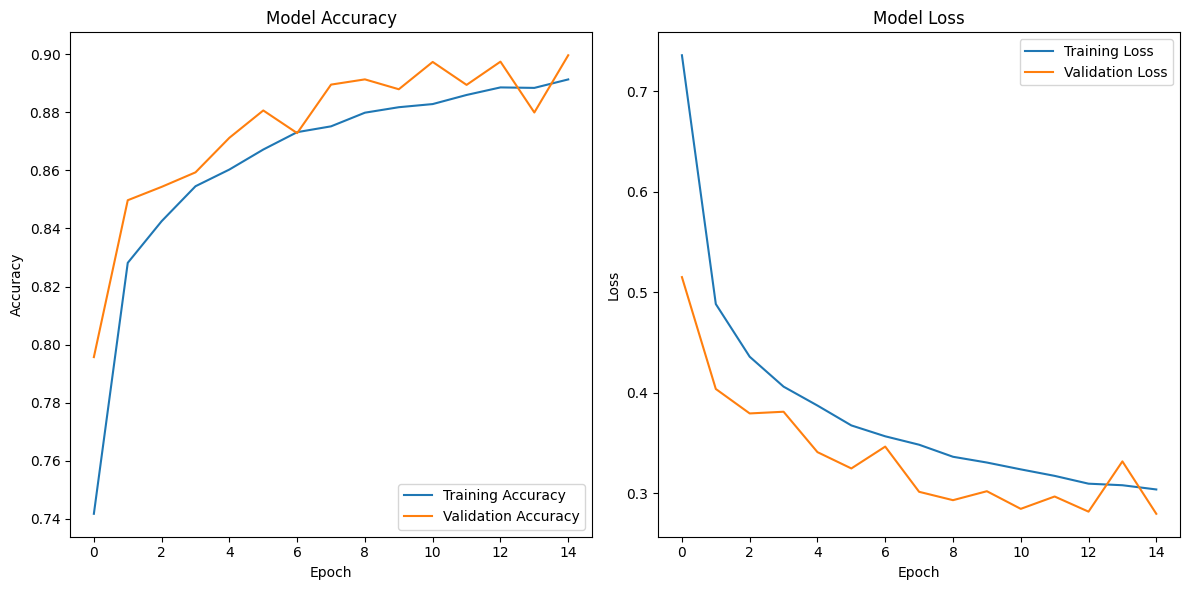

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to the [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add a channel dimension for the convolutional layers
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

# Save the model weights
model.save_weights('fashion_mnist_dcnn_weights.weights.h5')

# Alternatively, save the full model (architecture + weights)
model.save('fashion_mnist_dcnn_model.h5')

# Save the training history
with open('fashion_mnist_dcnn_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

3. Ask ChatGPT to write the code to plot the ROC curve for the classifier

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


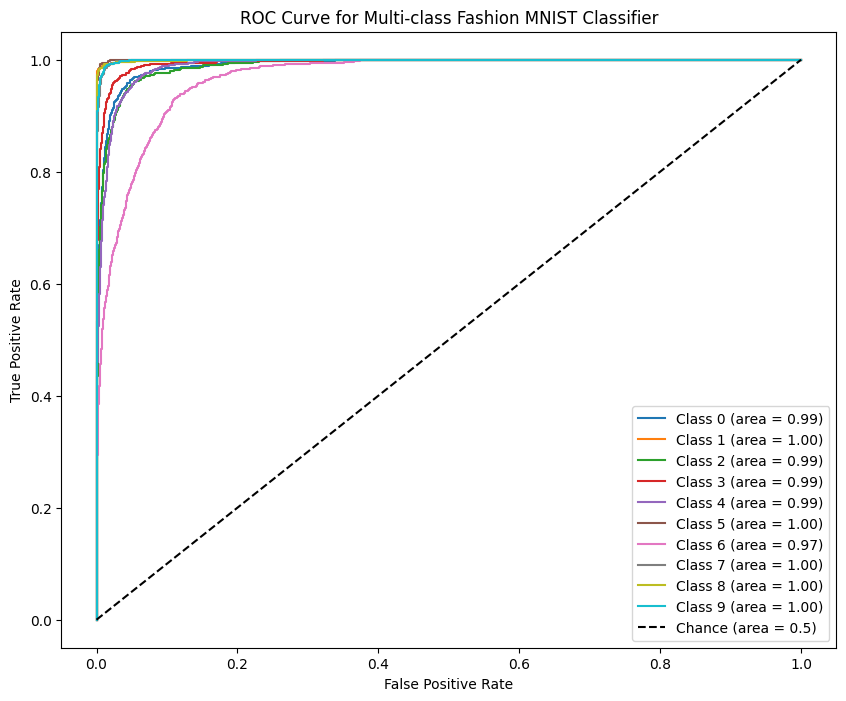

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model` is already trained and `test_images` and `test_labels` are loaded
n_classes = 10

# Binarize the labels for multi-class ROC
test_labels_binarized = label_binarize(test_labels, classes=list(range(n_classes)))

# Predict probabilities for the test set
y_score = model.predict(test_images)

# Plot the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Fashion MNIST Classifier')
plt.legend(loc='lower right')
plt.show()

4. Ask ChatGPT (and provide answers below):
- What is the dimensionality of the input to the classifier?
- What is the dimensionality of the output?
- Why the loss function is chosen?
- What is the metrics for performance?
- What is the role of MaxPool layers?
- What is the role of batch normalization layers?
- Can we use the Relu rather then softmax in the final layer
- What is the function of dropout layers?

Answers:

**What is the dimensionality of the input to the classifier?**


The input to the classifier for the Fashion MNIST dataset is an image with dimensions 28 × 28 pixels, with a single grayscale channel. Therefore, the input dimensionality to the classifier model is:

Height: 28 pixels

Width: 28 pixels

Channels: 1 (grayscale)

Thus, the input shape for each image is (28, 28, 1).

**What is the dimensionality of the output?**

The output dimensionality of the classifier is determined by the number of classes in the Fashion MNIST dataset. Since there are 10 classes (each representing a different type of clothing item), the output layer of the model has 10 units, each corresponding to one class.

Thus, the output dimensionality of the model is: (10,) for each input image.

**Why the loss function is chosen?**

The loss function chosen for this classifier is sparse categorical cross-entropy (sparse_categorical_crossentropy), which is well-suited for multi-class classification tasks with integer-labeled targets. Here's why it is chosen for the Fashion MNIST classifier:

**What is the metrics for performance?**

The performance metric chosen for this Fashion MNIST classifier is accuracy.
* Accuracy measures the proportion of correct predictions over the total predictions, calculated as:

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

* It is a simple and intuitive metric that indicates how often the model correctly classifies an image into the correct category.

**What is the role of MaxPool layers?**

Max Pooling (or MaxPool) layers are used in convolutional neural networks (CNNs) to reduce the spatial dimensions (height and width) of the feature maps, while retaining important information.

**What is the role of batch normalization layers?**

Batch normalization layers play an important role in improving the stability and efficiency of neural networks, particularly deep networks with multiple layers.

**Can we use the Relu rather then softmax in the final layer?**

No, using ReLU in the final layer of a multi-class classification model like this one would not work correctly. The softmax activation function is specifically designed for multi-class classification tasks, while ReLU is more suited for hidden layers within a network.

**What is the function of dropout layers?**

Dropout layers serve as a regularization technique in neural networks, helping to reduce overfitting and improve the model's ability to generalize to new data. Dropout is particularly effective in large, complex networks where overfitting is a common concern.

5. Perform the ablation study. Rewrite the code so that:
- we change the number of neurons (let's say divide it by factor of two several times)
- save the training curve
- save the ROC curve
And then plot them jointly. For example, if originally you had neural network with (128, 256) neurons, then you will generate training and ROC curves for (128,256), (64,  128), (32, 64), AND (16, 32).

Training model with dense layer sizes: (128, 256)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Training model with dense layer sizes: (64, 128)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training model with dense layer sizes: (32, 64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with dense layer sizes: (16, 32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


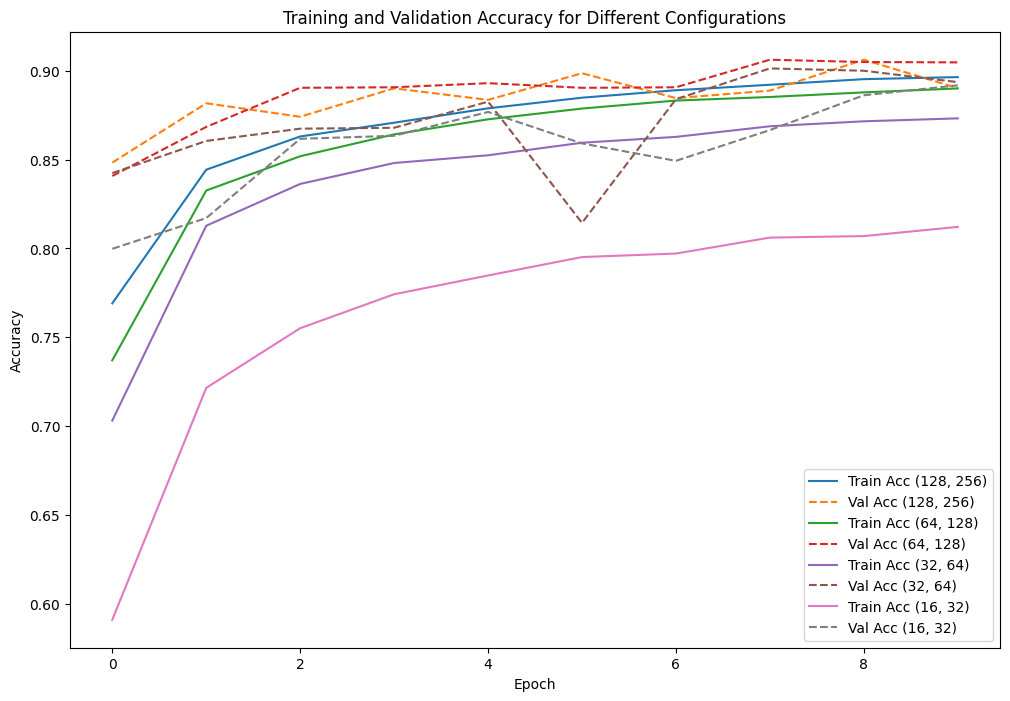

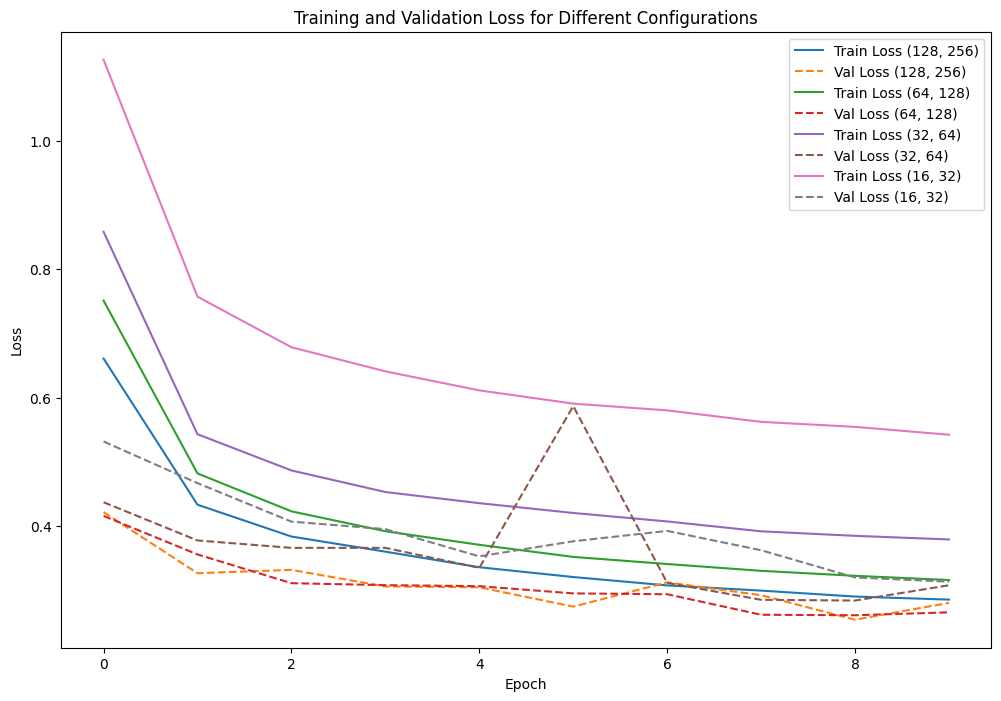

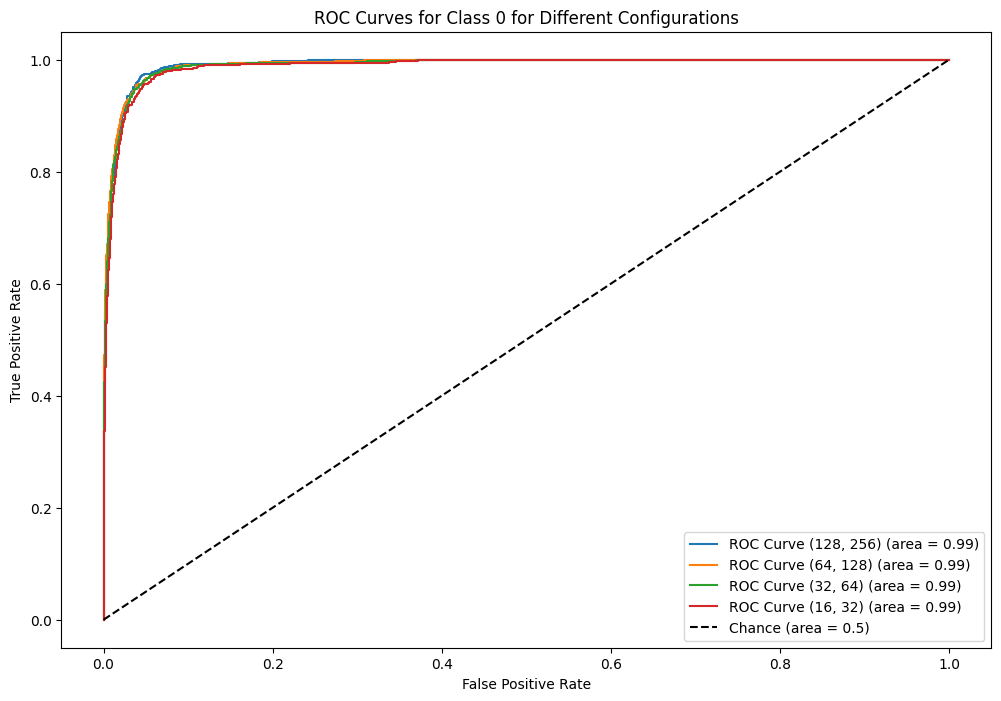

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pickle

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape for convolutional layers
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define function to build and compile the model with variable dense layer sizes
def build_model(dense_units):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(dense_units[0], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(dense_units[1], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define initial dense layer sizes
dense_configs = [(128, 256), (64, 128), (32, 64), (16, 32)]
histories = {}   # To store training history for each config
roc_curves = {}  # To store ROC data for each config

# Loop over different configurations of dense layer sizes
for dense_units in dense_configs:
    print(f"Training model with dense layer sizes: {dense_units}")

    # Build and train the model
    model = build_model(dense_units)
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels), verbose=0)

    # Save the training history
    histories[dense_units] = history.history

    # Get ROC curve data
    test_labels_binarized = label_binarize(test_labels, classes=range(10))
    y_score = model.predict(test_images)

    # Calculate ROC curves for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_curves[dense_units] = (fpr, tpr, roc_auc)

# Plot training and validation accuracy curves
plt.figure(figsize=(12, 8))
for dense_units, history in histories.items():
    plt.plot(history['accuracy'], label=f'Train Acc {dense_units}')
    plt.plot(history['val_accuracy'], linestyle='--', label=f'Val Acc {dense_units}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Configurations')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.figure(figsize=(12, 8))
for dense_units, history in histories.items():
    plt.plot(history['loss'], label=f'Train Loss {dense_units}')
    plt.plot(history['val_loss'], linestyle='--', label=f'Val Loss {dense_units}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Configurations')
plt.legend()
plt.show()

# Plot ROC curves for each configuration (for one class example, class 0)
plt.figure(figsize=(12, 8))
for dense_units, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr[0], tpr[0], label=f'ROC Curve {dense_units} (area = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Class 0 for Different Configurations')
plt.legend(loc='lower right')
plt.show()

# Fashion MNIST VAE

6. Ask Chat GPT to write the simple MLP AE for Fashion MNIST data. Visualzie the latent distribution and latent representations.

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0736 - val_loss: 0.0247
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0234 - val_loss: 0.0206
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0198 - val_loss: 0.0184
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0180 - val_loss: 0.0172
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170 - val_loss: 0.0167
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0140 - val_loss: 0.0138
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

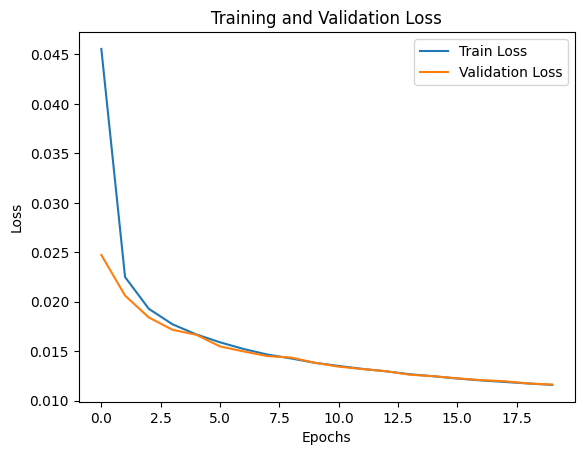

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


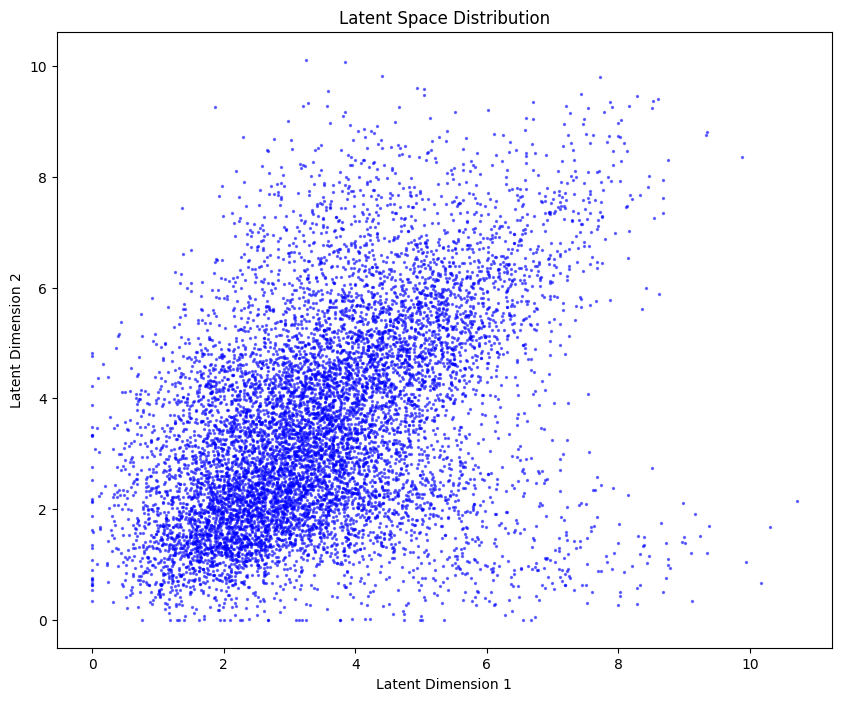

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


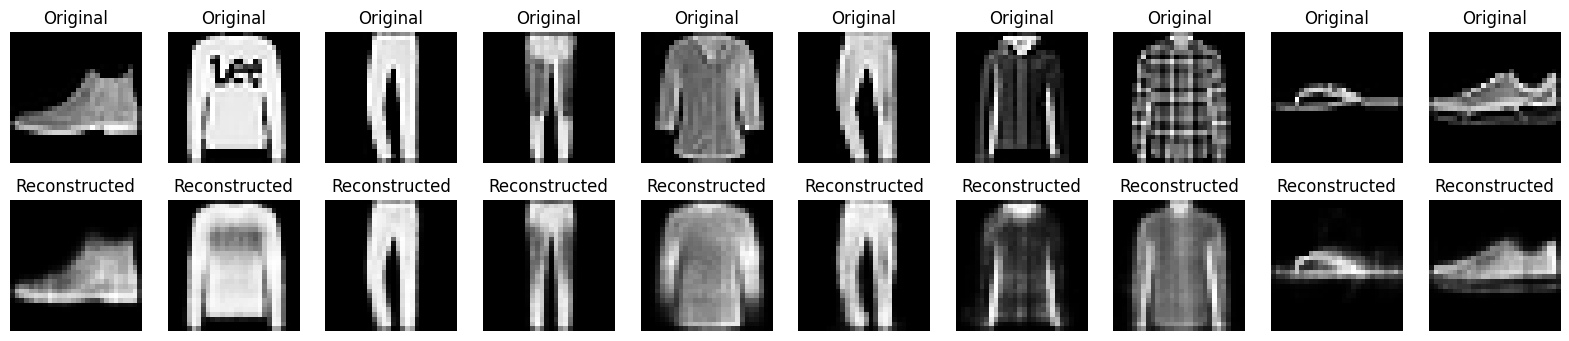

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, _), (test_images, _) = fashion_mnist.load_data()

# Normalize and flatten images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# Define latent dimension size
latent_dim = 64

# Build the autoencoder model
def build_autoencoder(latent_dim):
    # Encoder
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    latent = layers.Dense(latent_dim, activation='relu')(encoded)

    # Decoder
    decoded = layers.Dense(64, activation='relu')(latent)
    decoded = layers.Dense(128, activation='relu')(decoded)
    output_img = layers.Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = models.Model(input_img, output_img)
    encoder = models.Model(input_img, latent)  # Model for encoding latent space representations
    return autoencoder, encoder

# Compile and train the autoencoder
autoencoder, encoder = build_autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_images, train_images, epochs=20, batch_size=256,
                          validation_data=(test_images, test_images), verbose=1)

# Plot the training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Visualize the latent space
latent_representations = encoder.predict(test_images)
plt.figure(figsize=(10, 8))
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], alpha=0.5, s=2, c='blue')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Distribution')
plt.show()

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    reconstructed_img = autoencoder.predict(test_images[i].reshape(1, 784))
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

7. Ask Chat GPT to write the DCNN VAE AE for Fashion MNIST data. Visualzie the latent distribution and latent representations. Modify the program to save the latent represnetation and latent distributions every 5 steps as images.

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 421.1801 - val_loss: 386.1713
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 384.7140 - val_loss: 385.4477
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 384.9627 - val_loss: 385.3589
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 384.7301 - val_loss: 385.1194
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 385.1978 - val_loss: 385.1496
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 384.8335 - val_loss: 385.3804
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━

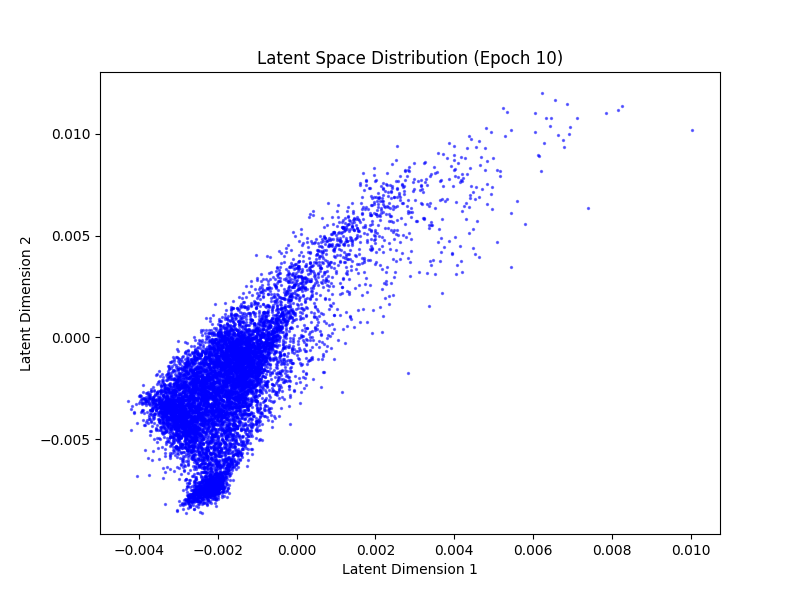

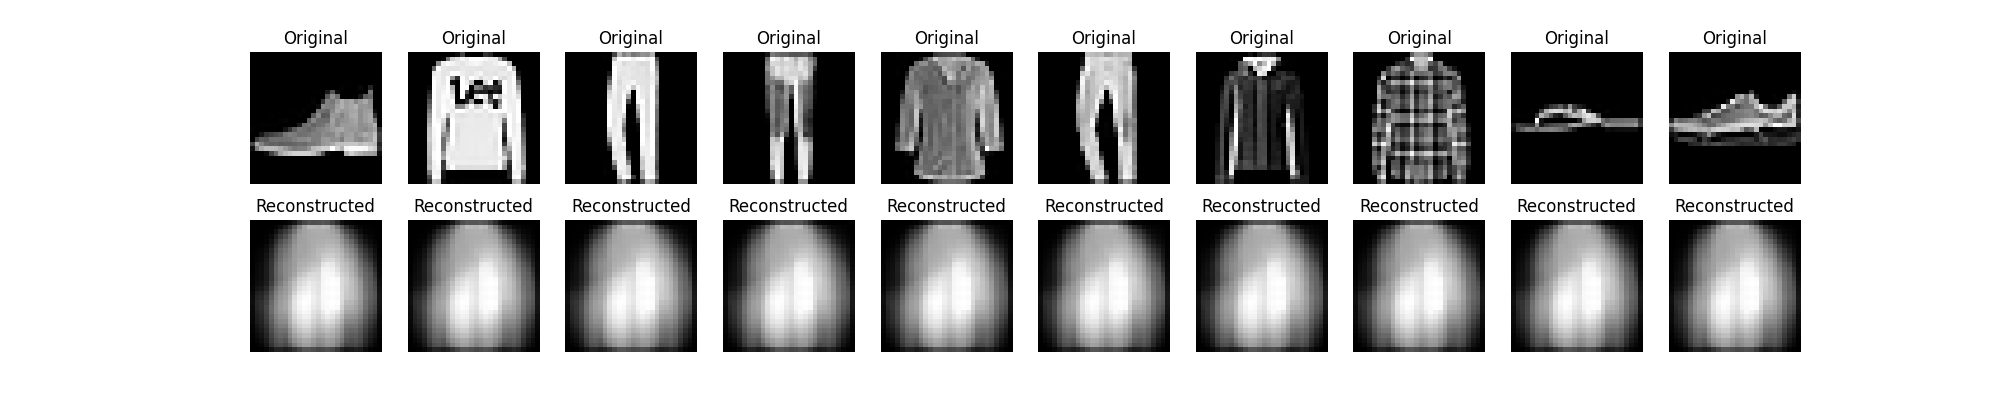

Displaying latent_distributions/latent_space_epoch_15.png and latent_distributions/reconstructions_epoch_15.png


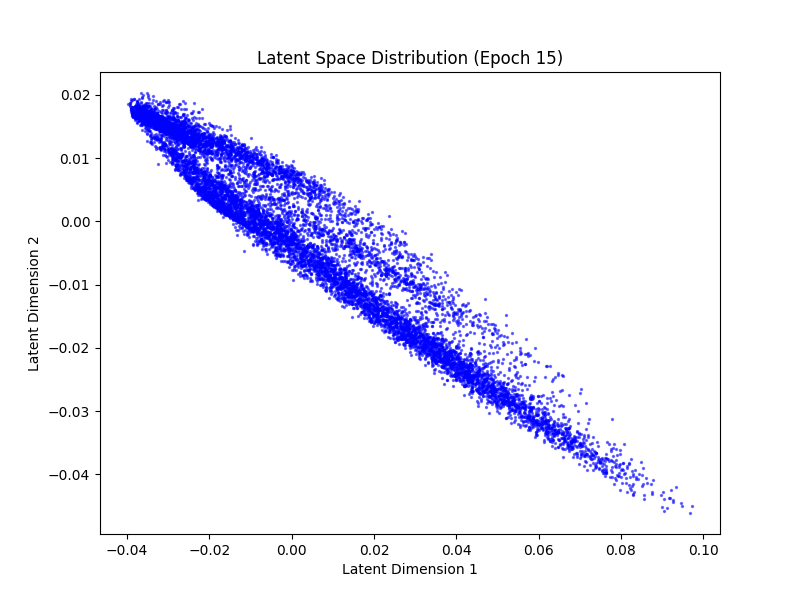

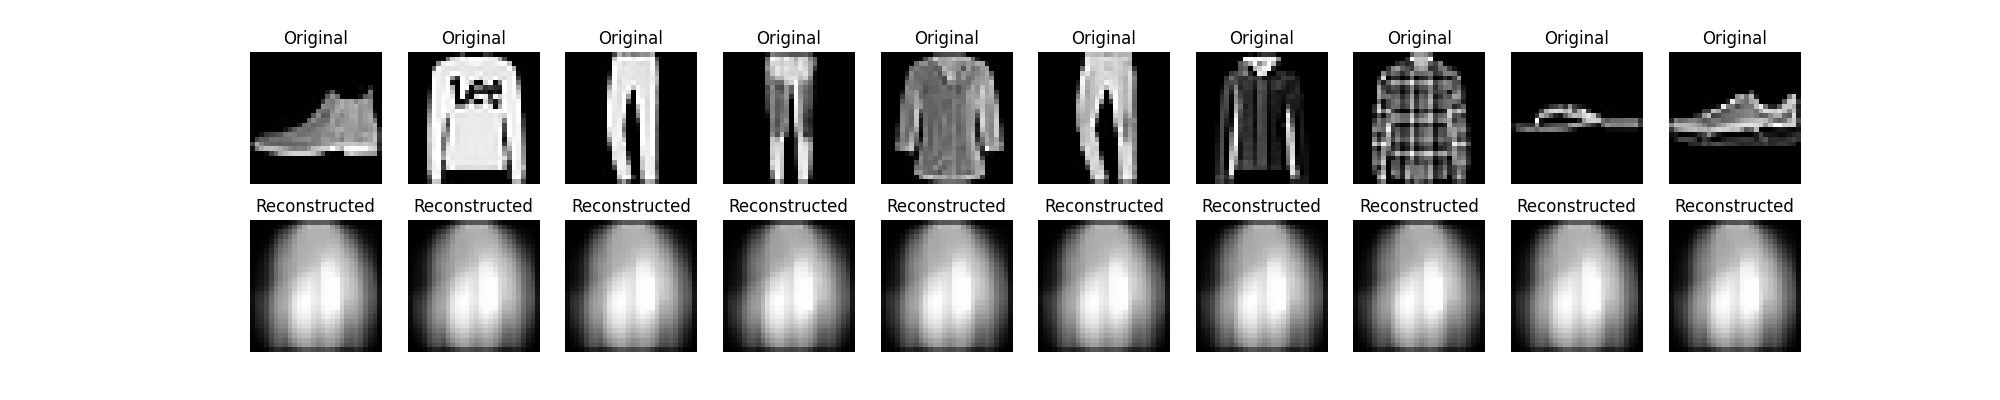

Displaying latent_distributions/latent_space_epoch_20.png and latent_distributions/reconstructions_epoch_20.png


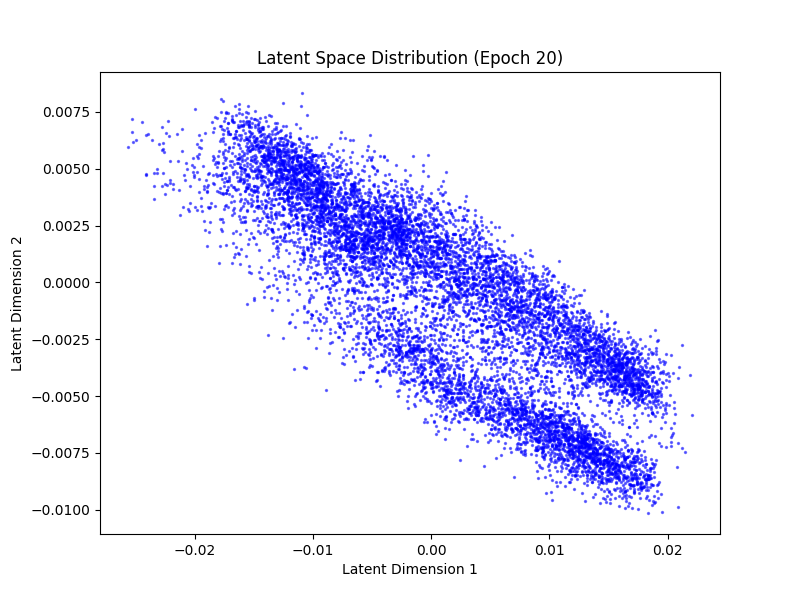

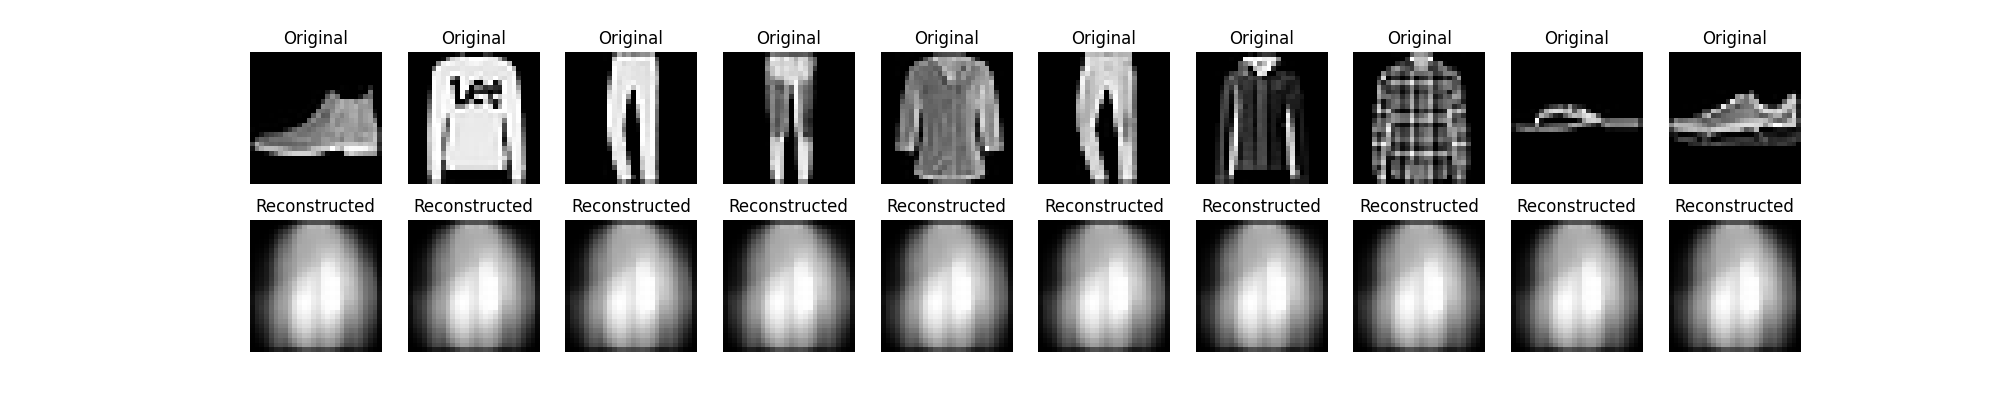

Displaying latent_distributions/latent_space_epoch_5.png and latent_distributions/reconstructions_epoch_5.png


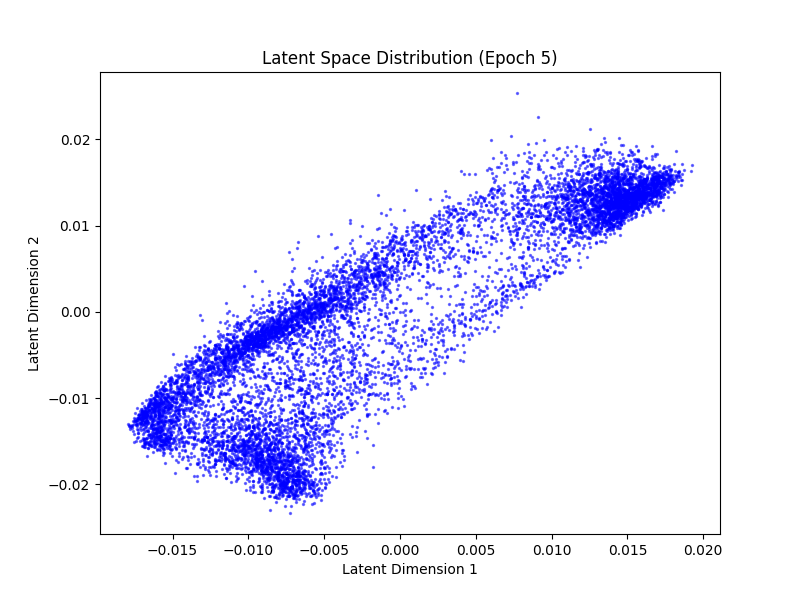

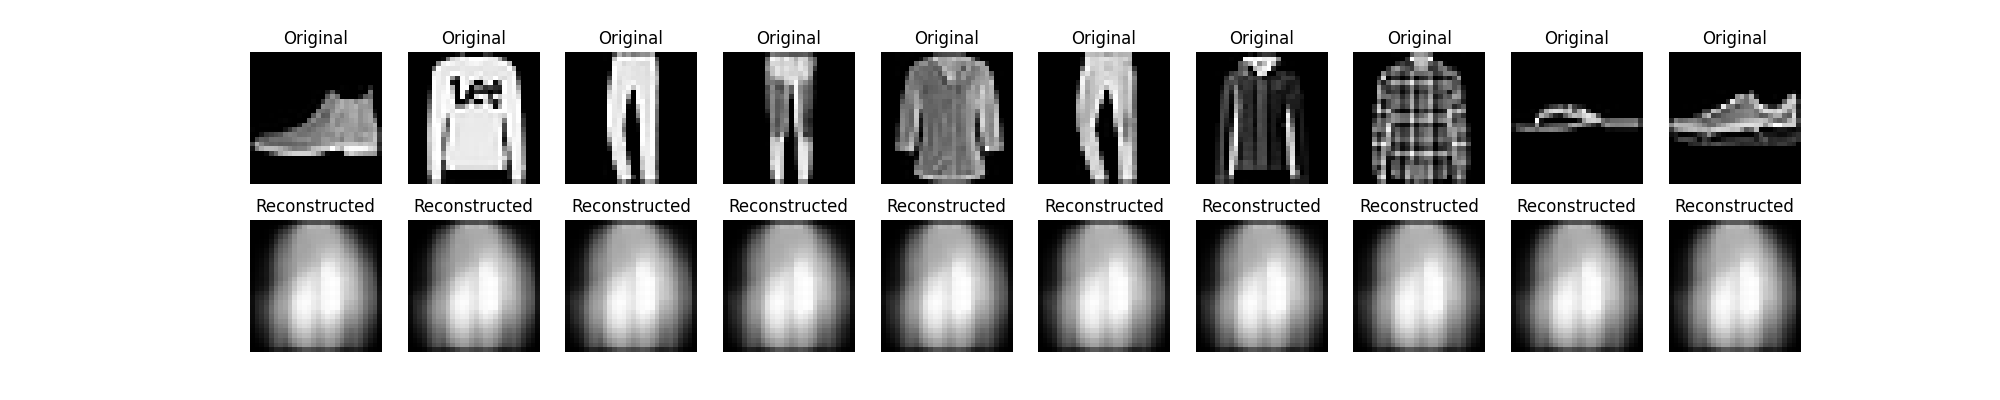

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, _), (test_images, _) = fashion_mnist.load_data()

# Normalize and reshape images for DCNN input
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Set the latent dimension
latent_dim = 2

# Encoder network for VAE
def build_encoder(latent_dim):
    encoder_input = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(encoder_input)
    x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Latent mean and log variance
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    # Latent space (z)
    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    encoder = models.Model(encoder_input, [z_mean, z_log_var, z], name="encoder")
    return encoder

# Decoder network for VAE
def build_decoder(latent_dim):
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
    decoder_output = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = models.Model(decoder_input, decoder_output, name="decoder")
    return decoder

# VAE Model with encoder and decoder
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        # VAE loss (reconstruction + KL divergence)
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(inputs, reconstructed)
        ) * 784
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstructed

# Initialize encoder, decoder, and VAE model
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')

# Directory for saving latent distribution images
if not os.path.exists("latent_distributions"):
    os.makedirs("latent_distributions")

# Custom callback to save latent space visualization and reconstructions every 5 epochs
class LatentVisualizationCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:
            # Get latent space representations
            z_mean, _, _ = self.model.encoder.predict(test_images)

            # Plot latent distribution
            plt.figure(figsize=(8, 6))
            plt.scatter(z_mean[:, 0], z_mean[:, 1], alpha=0.5, s=2, c='blue')
            plt.title(f'Latent Space Distribution (Epoch {epoch + 1})')
            plt.xlabel('Latent Dimension 1')
            plt.ylabel('Latent Dimension 2')
            plt.savefig(f"latent_distributions/latent_space_epoch_{epoch + 1}.png")
            plt.close()

            # Display and save reconstructed images
            n = 10  # Number of images to display
            plt.figure(figsize=(20, 4))
            for i in range(n):
                # Original images
                ax = plt.subplot(2, n, i + 1)
                plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
                plt.title("Original")
                plt.axis('off')

                # Reconstructed images
                reconstructed_img = self.model.predict(test_images[i].reshape(1, 28, 28, 1))
                ax = plt.subplot(2, n, i + 1 + n)
                plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
                plt.title("Reconstructed")
                plt.axis('off')

            plt.savefig(f"latent_distributions/reconstructions_epoch_{epoch + 1}.png")
            plt.close()

# Train the VAE with visualization callback
vae.fit(train_images, train_images, epochs=20, batch_size=128,
        validation_data=(test_images, test_images),
        callbacks=[LatentVisualizationCallback()])

# Load and display saved latent distributions and reconstructions
import glob
from IPython.display import Image, display

latent_images = sorted(glob.glob("latent_distributions/latent_space_epoch_*.png"))
reconstruction_images = sorted(glob.glob("latent_distributions/reconstructions_epoch_*.png"))

for latent_img, recon_img in zip(latent_images, reconstruction_images):
    print(f"Displaying {latent_img} and {recon_img}")
    display(Image(filename=latent_img))
    display(Image(filename=recon_img))

8. Can you upload the images and make a movie?

In [ ]:
import imageio.v2 as imageio
import glob
import numpy as np
from skimage.transform import resize

# Load latent space and reconstruction images
latent_images = sorted(glob.glob("latent_distributions/latent_space_epoch_*.png"))
reconstruction_images = sorted(glob.glob("latent_distributions/reconstructions_epoch_*.png"))

# Set target dimensions as multiples of 16
target_height = 608  # Closest multiple of 16 for a height around 600
target_width = 800   # Closest multiple of 16 for a width around 800

combined_frames = []

for latent_img_path, recon_img_path in zip(latent_images, reconstruction_images):
    # Load images
    latent_img = imageio.imread(latent_img_path)
    recon_img = imageio.imread(recon_img_path)

    # Resize images to the target dimensions
    latent_img_resized = resize(latent_img, (target_height, target_width), anti_aliasing=True)
    recon_img_resized = resize(recon_img, (target_height, target_width), anti_aliasing=True)

    # Convert resized images to uint8 format (required by imageio)
    latent_img_resized = (latent_img_resized * 255).astype(np.uint8)
    recon_img_resized = (recon_img_resized * 255).astype(np.uint8)

    # Concatenate images side by side
    combined = np.concatenate((latent_img_resized, recon_img_resized), axis=1)
    combined_frames.append(combined)

# Save as GIF
imageio.mimsave('latent_space_evolution.gif', combined_frames, duration=0.5)  # 0.5 sec per frame

# Save as MP4 video
imageio.mimsave('latent_space_evolution.mp4', combined_frames, fps=2)  # 2 frames per second

print("GIF and MP4 video saved as 'latent_space_evolution.gif' and 'latent_space_evolution.mp4'.")


GIF and MP4 video saved as 'latent_space_evolution.gif' and 'latent_space_evolution.mp4'.


9. Write the defintions for:
- Latent istribution
- Latent represnetation
- Disentangling of represnetations
- Conditional VAE

Answers:

**Latent Distribution:** The latent distribution is a probability distribution that describes the possible values of the latent variables in a model, typically within a lower-dimensional space. In variational autoencoders (VAEs), for example, the latent distribution is often modeled as a Gaussian (normal) distribution, from which the latent variables are sampled. The latent distribution helps the model generate new, similar instances by sampling from this space and provides a smooth representation that captures essential data features.

In a VAE, the encoder learns the parameters (mean and variance) of the latent distribution, which allows it to map input data to a structured latent space, usually constrained to follow a normal distribution. This smooth latent distribution helps the model generate coherent and realistic outputs when decoding from the latent space.

**Latent Representation:** A latent representation (or latent vector) is a compressed, lower-dimensional representation of the input data, capturing its essential features and structure. This representation resides in the latent space and is created by the encoder part of an autoencoder or similar architecture. Latent representations typically abstract high-level patterns in the data, reducing noise and redundancy while preserving core information.

In the context of an autoencoder, the encoder maps the input data to a latent representation, which is then decoded back to reconstruct the input. Latent representations are often used for purposes like data compression, feature extraction, or generative tasks, as they can capture complex patterns with fewer dimensions than the original data.

**Disentangling of Representations:** Disentangling of representations refers to the process of organizing the latent representation space such that each dimension or subset of dimensions corresponds to a specific, independent feature or factor of variation in the data. When representations are disentangled, changes in one latent dimension (or factor) affect only one aspect of the output, making the model more interpretable and controllable.

For example, in an image generation model, a disentangled latent space might have one dimension controlling an object's orientation and another controlling its color. Disentangled representations are highly desirable in generative models like VAEs because they allow for fine-grained control and modification of generated data, improving interpretability and often generalization.

**Conditional VAE (CVAE):** A Conditional Variational Autoencoder (CVAE) is an extension of the VAE that allows for conditioning the generation of outputs on additional information, such as labels or other features. In a CVAE, both the encoder and decoder are conditioned on this additional information, which can be anything that provides context, like a class label or specific attributes.

For example, in a CVAE trained on labeled images, you could condition the model on the label "shoe" to generate different styles of shoes. The conditioning input (like the label) is concatenated with the input data in the encoder and with the latent vector in the decoder. This setup allows the CVAE to produce outputs that are influenced by the given condition, enabling more controlled and targeted generation.

10. Explore if the ChatGPT can write a code for the VAE with rotational invariance

Answers:  
Creating a Variational Autoencoder (VAE) with rotational invariance requires designing the model so that it is robust to rotations in the input data. This can be beneficial for tasks where rotational variations do not change the class or properties of the data (e.g., images of objects viewed from different angles).

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 421.4723 - val_loss: 385.7555
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 385.3500 - val_loss: 385.3255
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 384.4954 - val_loss: 385.3611
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 384.8571 - val_loss: 385.5020
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 384.6498 - val_loss: 385.4550
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 384.4373 - val_loss: 385.4438
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 384.5688 - val_loss: 385.1329
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 384.5805 - val_loss: 385.1625
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 384.4493 - val_loss: 385.4768
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 384.7032 - val_loss: 385.6056
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 384.2949 - val_loss: 385.1

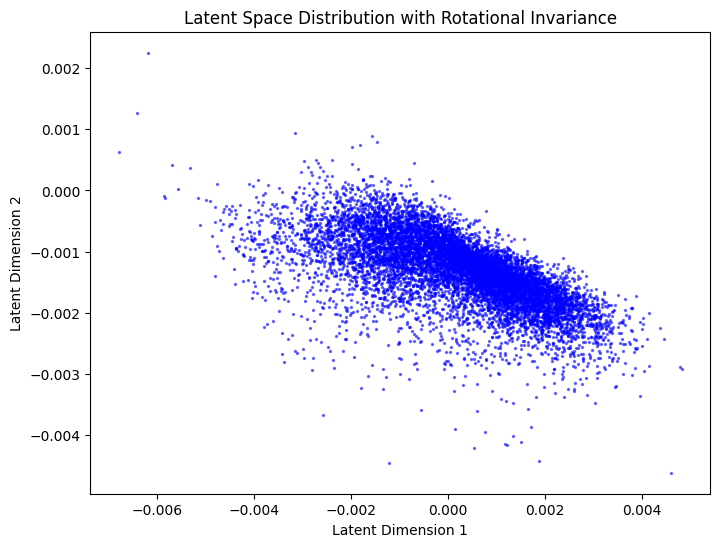

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


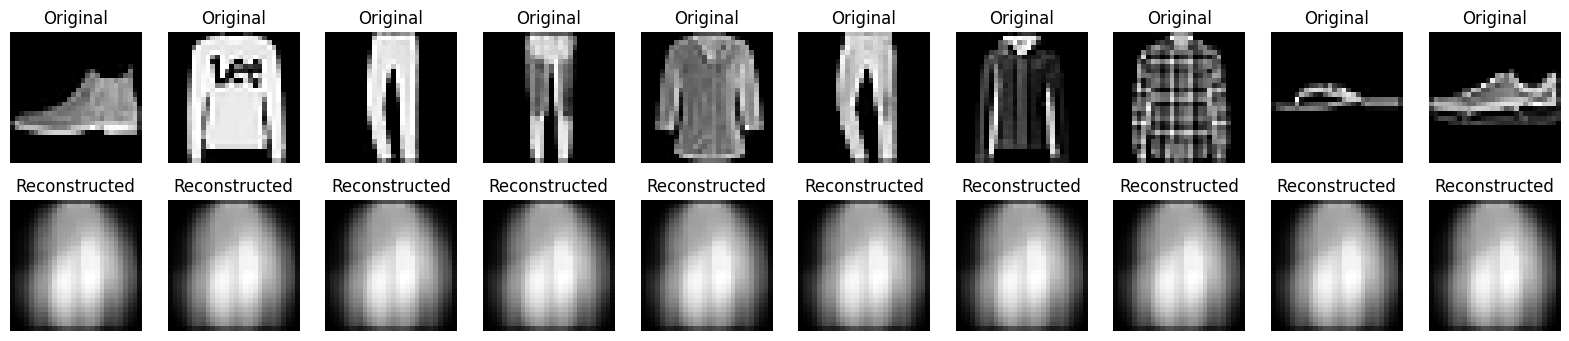

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, _), (test_images, _) = fashion_mnist.load_data()

# Normalize images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape for convolutional input
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Define latent dimension size
latent_dim = 2

# Data Augmentation with Random Rotation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2)  # Rotate images by a maximum of 20%
])

# Encoder network
def build_encoder(latent_dim):
    encoder_input = layers.Input(shape=(28, 28, 1))
    x = data_augmentation(encoder_input)  # Apply rotation augmentation
    x = layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Latent mean and log variance
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    # Latent space (z)
    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    encoder = models.Model(encoder_input, [z_mean, z_log_var, z], name="encoder")
    return encoder

# Decoder network
def build_decoder(latent_dim):
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
    decoder_output = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = models.Model(decoder_input, decoder_output, name="decoder")
    return decoder

# VAE Model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)

        # VAE loss (reconstruction + KL divergence)
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(inputs, reconstructed)
        ) * 784
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstructed

# Build and compile the VAE
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(train_images, train_images, epochs=20, batch_size=128, validation_data=(test_images, test_images))

# Visualize the latent space
z_mean, _, _ = vae.encoder.predict(test_images)
plt.figure(figsize=(8, 6))
plt.scatter(z_mean[:, 0], z_mean[:, 1], alpha=0.5, s=2, c='blue')
plt.title('Latent Space Distribution with Rotational Invariance')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    reconstructed_img = vae.predict(test_images[i].reshape(1, 28, 28, 1))
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

11. Ask ChatGPT to write a class-conditioned VAE and plot the latent represnetations.

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 369.9047 - val_loss: 309.4225
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 307.9793 - val_loss: 308.9666
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 307.6349 - val_loss: 309.0883
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 307.1471 - val_loss: 308.9258
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 308.1368 - val_loss: 308.8199
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 307.4971 - val_loss: 309.0072
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 307.4039 - val_loss: 309.3554
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 307.0156 - val_loss: 308.6966
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 307.2491 - val_loss: 308.9543
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 307.6420 - val_loss: 308.7248
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 307.2233 - val_loss: 308.8285
Epoch 

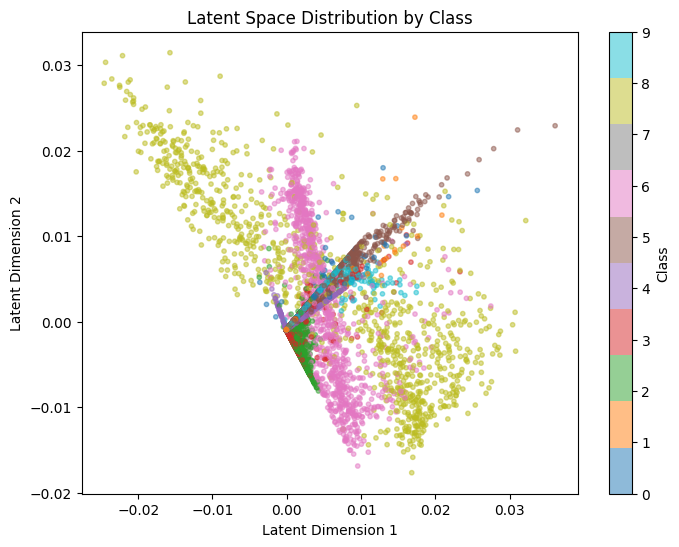

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Define the latent dimension size and the number of classes
latent_dim = 2
num_classes = 10

# Function to build the encoder with conditioning on the class label
def build_encoder(latent_dim, num_classes):
    image_input = layers.Input(shape=(28, 28, 1))
    label_input = layers.Input(shape=(num_classes,))

    # Concatenate the label with the input image features
    x = layers.Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(image_input)
    x = layers.Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.concatenate([x, label_input])  # Condition on class label
    x = layers.Dense(128, activation='relu')(x)

    # Latent mean and log variance
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    # Latent space (z)
    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    encoder = models.Model([image_input, label_input], [z_mean, z_log_var, z], name="encoder")
    return encoder

# Function to build the decoder with conditioning on the class label
def build_decoder(latent_dim, num_classes):
    latent_input = layers.Input(shape=(latent_dim,))
    label_input = layers.Input(shape=(num_classes,))

    # Concatenate the label with the latent input
    x = layers.concatenate([latent_input, label_input])  # Condition on class label
    x = layers.Dense(7 * 7 * 64, activation='relu')(x)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
    decoder_output = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = models.Model([latent_input, label_input], decoder_output, name="decoder")
    return decoder

# VAE Model with class-conditioned encoder and decoder
class CVAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(CVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        images, labels = inputs
        z_mean, z_log_var, z = self.encoder([images, labels])
        reconstructed = self.decoder([z, labels])

        # VAE loss (reconstruction + KL divergence)
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(images, reconstructed)
        ) * 784
        kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstructed

# Build the encoder, decoder, and CVAE
encoder = build_encoder(latent_dim, num_classes)
decoder = build_decoder(latent_dim, num_classes)
cvae = CVAE(encoder, decoder)
cvae.compile(optimizer='adam')

# One-hot encode the labels for conditioning
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)

# Train the CVAE
cvae.fit([train_images, train_labels_one_hot], train_images, epochs=20, batch_size=128,
         validation_data=([test_images, test_labels_one_hot], test_images))

# Plot latent space distribution colored by class
z_mean, _, _ = encoder.predict([test_images, test_labels_one_hot])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=test_labels, cmap='tab10', alpha=0.5, s=10)
plt.colorbar(scatter, ticks=range(10), label='Class')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Distribution by Class')
plt.show()

12. Can you identify the meaning of the latent variables?

Answers:  
In a Class-Conditioned VAE, the latent variables typically capture essential, compressed features that represent high-level data characteristics, but they don’t always correspond directly to interpretable attributes. To understand the meaning of each latent variable, latent traversal and visualization are effective techniques. For instance, by varying one latent variable while keeping others constant (latent traversal), we can observe how the generated images change, which reveals whether a variable might control features like shape, size, or style. Additionally, latent space interpolation between two points (e.g., between classes like "shirt" and "coat") can show smooth transitions, suggesting that some variables capture structural differences. Advanced methods like β-VAE can also encourage more interpretable, disentangled latent dimensions.

13. Explore with ChatGPT how VAEs are used for (one of):
- Image analysis
- Deep fakes
- Natural Language Programming
- Drug discovery
- Property optimization

# Example

14. Example: VAE written by ChatGPT

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 404.7104 - val_loss: 333.4468
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 327.2131 - val_loss: 317.0053
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 312.3314 - val_loss: 312.1765
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 307.9045 - val_loss: 307.2218
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 304.4645 - val_loss: 305.4099
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 303.1446 - val_loss: 303.8751
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 301.1212 - val_loss: 303.0666
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 299.6786 - val_loss: 302.3758
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 299.8836 - val_loss: 301.8721
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 299.1772 - val_loss: 301.5203
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 297.9478 - val_loss: 299.5285
Epoch 

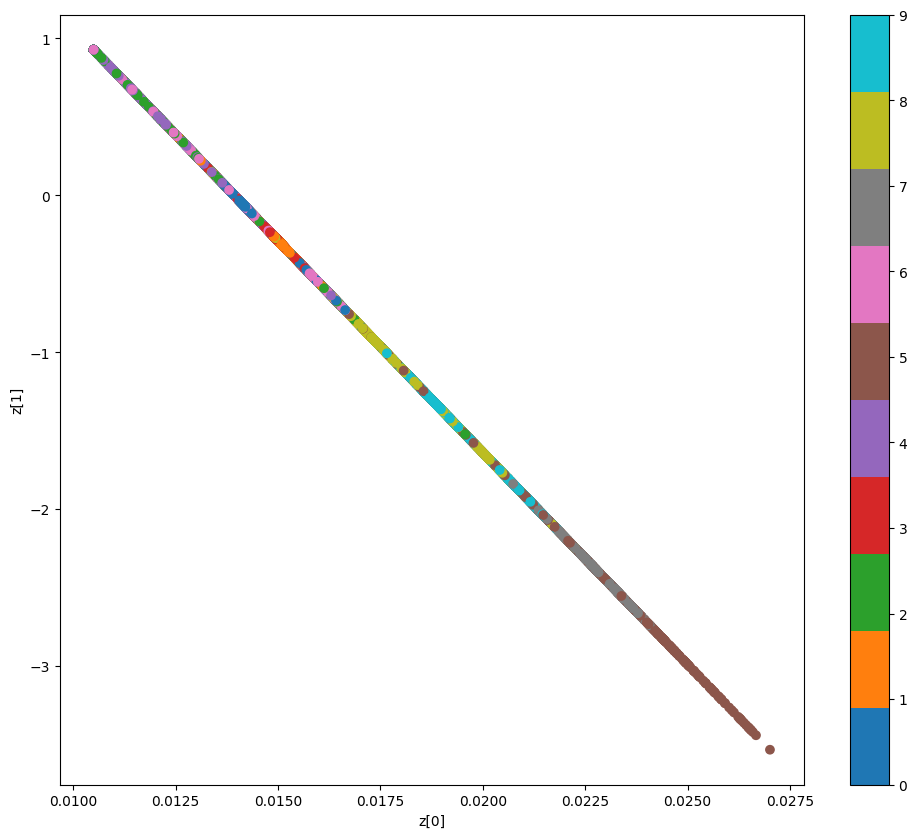

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

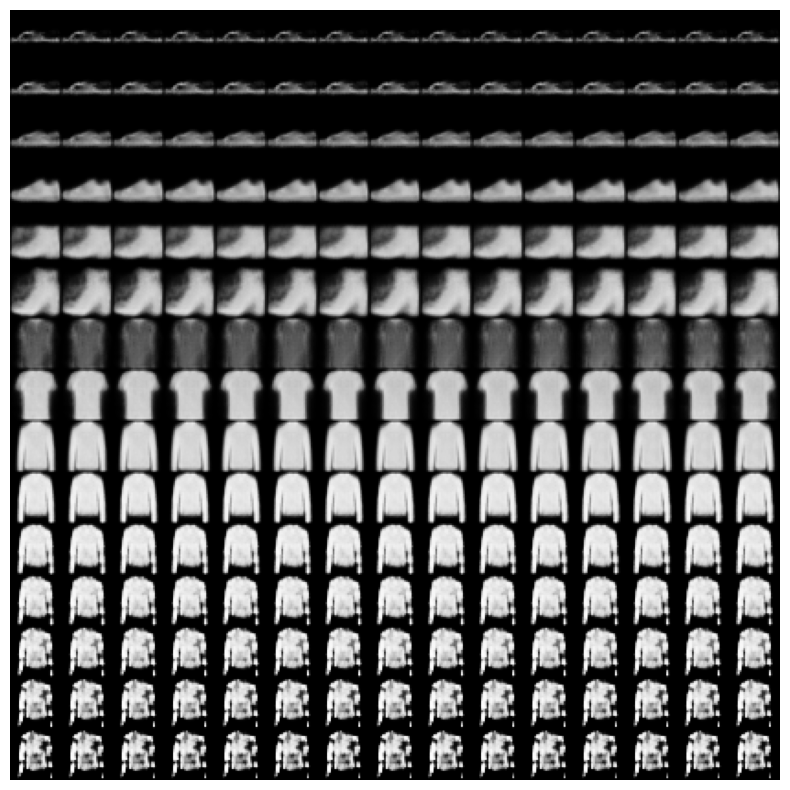

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1]).astype('float32') / 255
x_test = np.reshape(x_test, [-1, image_size, image_size, 1]).astype('float32') / 255

latent_dim = 2  # Dimensionality of the latent space

# Encoder
inputs = Input(shape=(image_size, image_size, 1), name='encoder_input')
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')

# VAE with custom loss calculation
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)

        # Compute reconstruction loss
        reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(reconstructed))
        reconstruction_loss *= image_size * image_size

        # Compute KL divergence
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        kl_loss *= -0.5

        # Add losses
        self.add_loss(K.mean(reconstruction_loss + kl_loss))
        return reconstructed

# Instantiate and compile VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(x_train, epochs=30, batch_size=128, validation_data=(x_test, None))

# Plot latent space with class labels
def plot_label_clusters(encoder, data, labels):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap='tab10')
    plt.colorbar(scatter)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(encoder, x_test, y_test)

# Display a grid of images from the 2D latent space
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()